In [45]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy.units import Quantity
from slsim.false_positive_pop import FalsePositivePop
import slsim.Pipelines as pipelines
import slsim.Sources as sources
import slsim.Deflectors as deflectors
from slsim.image_simulation import lens_image

# False positive simulations

This notebook walks through the basics of simulating a galaxy-galaxy strong lenses like false postive.

The notebook goes in three steps:

1. The populations of elliptical and blue galaxy is produced.
2. The given number of false positive is generated.
3. A random false positive is selected and visualized in an image.


In [3]:
# define a cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# define a sky area
sky_area = Quantity(value=0.1, unit="deg2")


# define limits in the intrinsic deflector and source population (in addition to the skypy config
# file)
kwargs_deflector_cut = {"band": "g", "band_max": 28, "z_min": 0.01, "z_max": 2.5}
kwargs_source_cut = {"band": "g", "band_max": 28, "z_min": 0.1, "z_max": 5.0}

In [5]:
# Generate galaxy population using skypy pipeline.
galaxy_simulation_pipeline = pipelines.SkyPyPipeline(
    skypy_config=None, sky_area=sky_area, filters=None, cosmo=cosmo
)

In [6]:
# Initiate deflector population class.
lens_galaxies = deflectors.EllipticalLensGalaxies(
    galaxy_list=galaxy_simulation_pipeline.red_galaxies,
    kwargs_cut=kwargs_deflector_cut,
    kwargs_mass2light=0.1,
    cosmo=cosmo,
    sky_area=sky_area,)
#Initialize source pospulation class
source_galaxies=sources.Galaxies(
    galaxy_list=galaxy_simulation_pipeline.blue_galaxies,
    kwargs_cut=kwargs_source_cut,
    cosmo=cosmo,
    sky_area=sky_area,
    catalog_type="skypy",
)

/Users/narayankhadka/slsim/slsim/Deflectors/elliptical_lens_galaxies.py:39: UserWarning: Angular size is converted to arcsec because provided input_catalog_type is skypy. If this is not correct, please refer to the documentation of the class you are using
  galaxy_list = param_util.catalog_with_angular_size_in_arcsec(


In [7]:
# make galaxy-galaxy lens like false positive class.
fp_pop = FalsePositivePop(
    elliptical_galaxy_population=lens_galaxies,
    blue_galaxy_population=source_galaxies,
    cosmo=cosmo
)

## Generate given number of false positive

In [13]:
fp_class=fp_pop.draw_false_positive(number=100)

## Simulate image in i-band

In [41]:
# load your psf kernel and transform matrix. If you have your own psf, please provide
# it here.
path = "../tests/TestData/psf_kernels_for_deflector.npy"
psf_kernel = 1 * np.load(path)
psf_kernel[psf_kernel < 0] = 0
transform_matrix = np.array([[0.2, 0], [0, 0.2]])

In [43]:
image_false_positive_i = lens_image(
    lens_class=fp_class[18],
    band="i",
    mag_zero_point=31,
    num_pix=64,
    psf_kernel=psf_kernel,
    transform_pix2angle=transform_matrix,
    exposure_time=30,
    with_deflector=True,
    with_source=False,
)

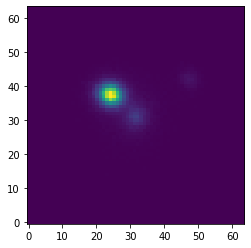

In [44]:
plt.imshow(image_false_positive_i, origin="lower")